In [83]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
# Carrega o dataset como dataframe
df = pd.read_csv('dataset/video_games_2016.csv')

In [85]:
# Remove NAs
# df.dropna(inplace=True)

# Remove outliers
Q1 = df['Global_Sales'].quantile(0.02)
Q3 = df['Global_Sales'].quantile(0.98)

df = df[(df['Global_Sales'] >= Q1 ) & (df['Global_Sales'] <= Q3 )]

In [86]:
# Cria coluna com a região que mais vendeu
column_to_number = {
    'NA_Sales':    "NA",
    'EU_Sales':    "EU",
    'JP_Sales':    "JP",
    'Other_Sales': "Outro" 
}

df['Greatest'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1).map(column_to_number)

/tmp/ipykernel_3671950/2127722431.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


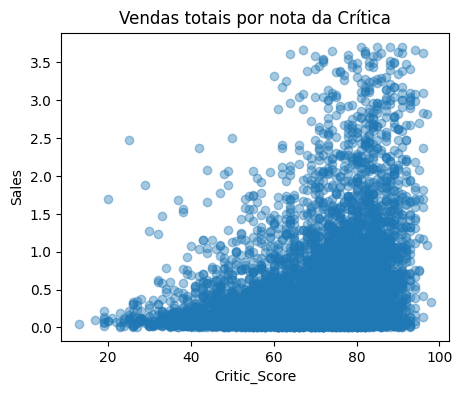

In [87]:

plt.figure(figsize=(5, 4))
plt.scatter( 
  df['Critic_Score'],
  df['Global_Sales'],

  cmap='viridis',
  alpha=.4
)

plt.ylabel('Sales')
plt.xlabel('Critic_Score')

plt.title('Vendas totais por nota da Crítica')

plt.show()

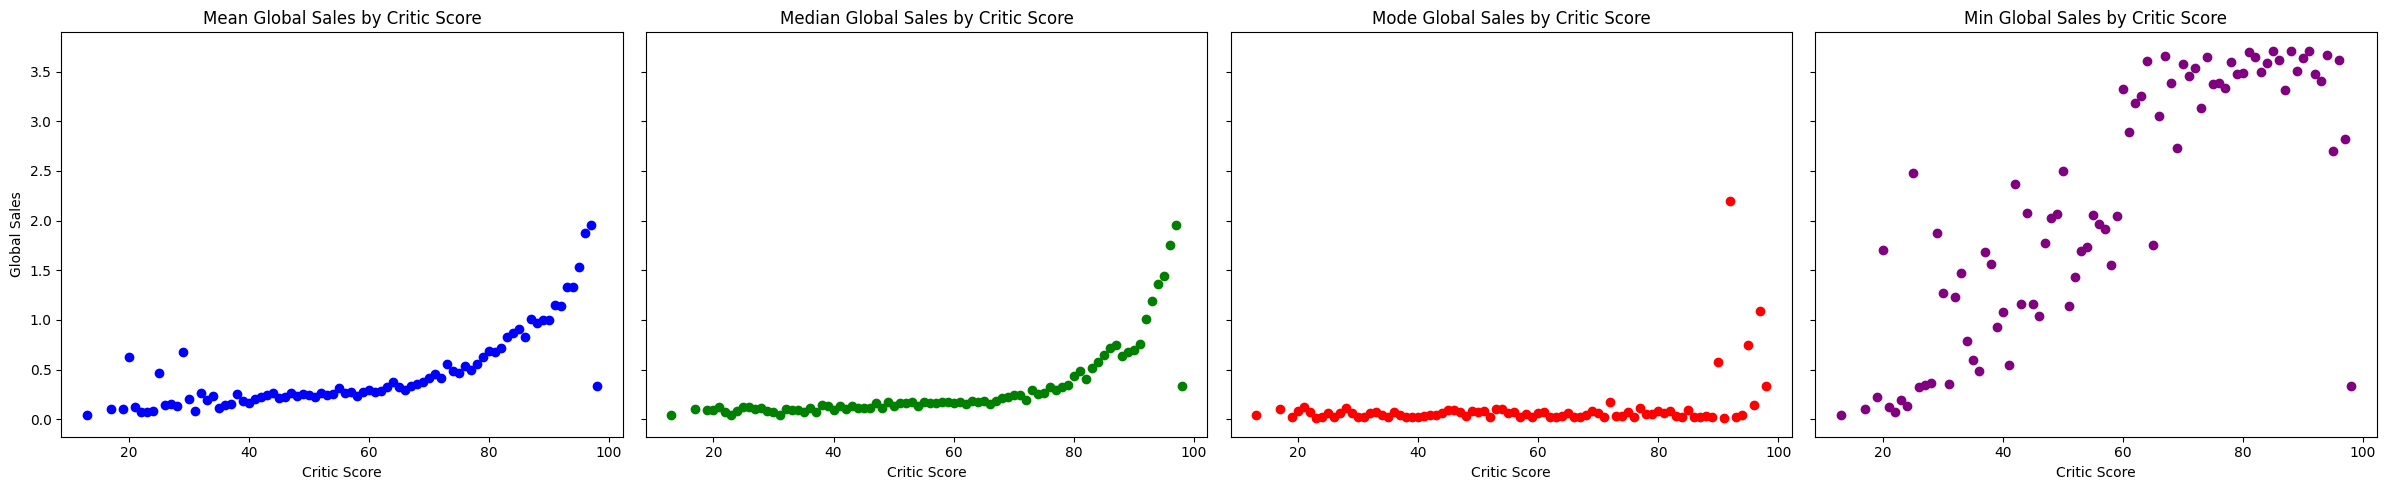

In [88]:
# Group by Critic_Score and calculate mean, median, mode, and min of Global_Sales
mean_sales = df.groupby('Critic_Score')['Global_Sales'].mean().reset_index()
median_sales = df.groupby('Critic_Score')['Global_Sales'].median().reset_index()
mode_sales = df.groupby('Critic_Score')['Global_Sales'].apply(lambda x: x.mode().iloc[0]).reset_index()
min_sales = df.groupby('Critic_Score')['Global_Sales'].max().reset_index()
# Create a figure with 4 subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(24, 5), sharey=True)

# Mean chart
axes[0].scatter(mean_sales['Critic_Score'], mean_sales['Global_Sales'], color='blue')
axes[0].set_title('Mean Global Sales by Critic Score')
axes[0].set_xlabel('Critic Score')
axes[0].set_ylabel('Global Sales')

# Median chart
axes[1].scatter(median_sales['Critic_Score'], median_sales['Global_Sales'], color='green')
axes[1].set_title('Median Global Sales by Critic Score')
axes[1].set_xlabel('Critic Score')

# Mode chart
axes[2].scatter(mode_sales['Critic_Score'], mode_sales['Global_Sales'], color='red')
axes[2].set_title('Mode Global Sales by Critic Score')
axes[2].set_xlabel('Critic Score')

# Min chart
axes[3].scatter(min_sales['Critic_Score'], min_sales['Global_Sales'], color='purple')
axes[3].set_title('Min Global Sales by Critic Score')
axes[3].set_xlabel('Critic Score')

# Display the plots
plt.tight_layout()
plt.show()

/tmp/ipykernel_3671950/3479053195.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


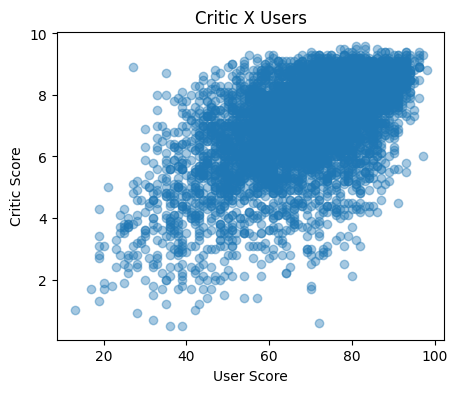

In [89]:
fdf = df

plt.figure(figsize=(5, 4))
plt.scatter( 
  fdf['Critic_Score'],
  fdf['User_Score'],

  cmap='viridis',
  alpha=.4
)

plt.ylabel('Critic Score')
plt.xlabel('User Score')

plt.title('Critic X Users')

plt.show()

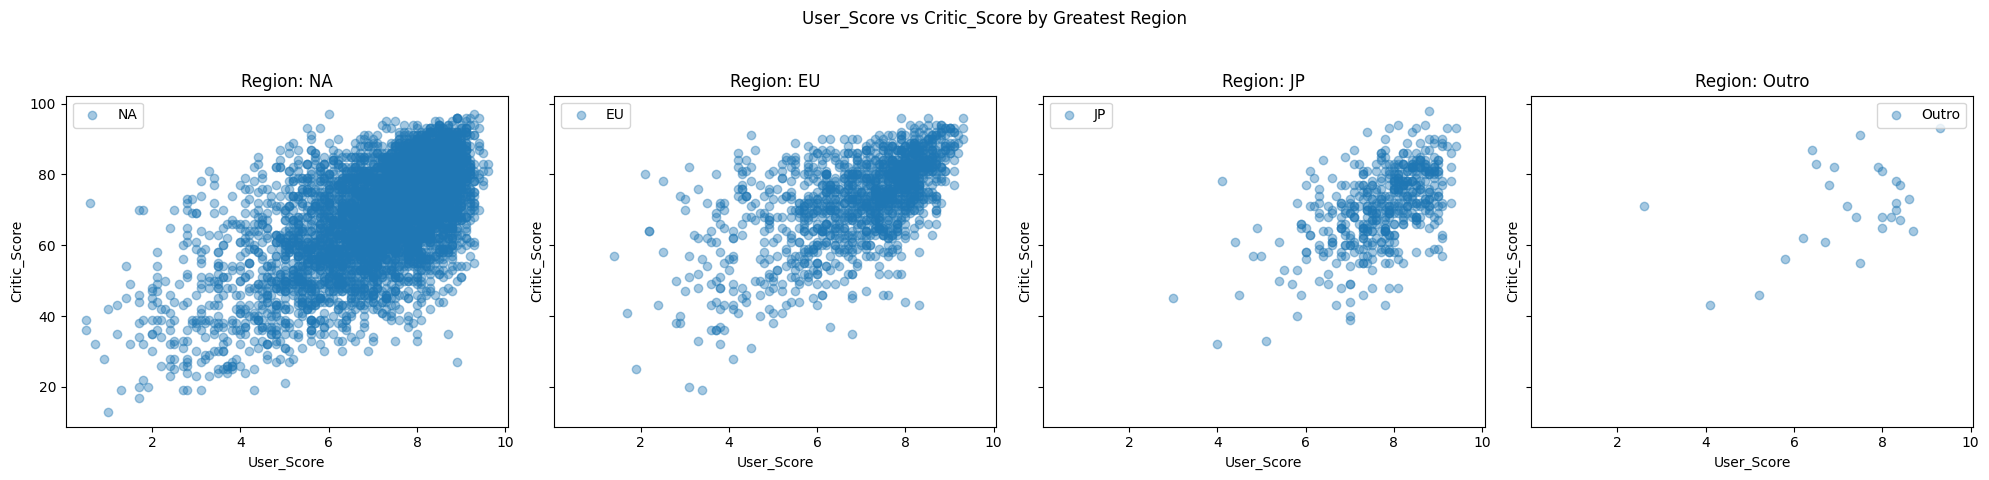

In [90]:
# Plot settings
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
fig.suptitle("User_Score vs Critic_Score by Greatest Region")

# Define regions to filter by
regions = ["NA", "EU", "JP", "Outro"]

# Create scatter plots for each region
for i, region in enumerate(regions):
    ax = axes[i]
    filtered_df = df[df["Greatest"] == region]
    ax.scatter(
        filtered_df["User_Score"], 
        filtered_df["Critic_Score"], 
        label=region, alpha=0.4
    )
    ax.set_title(f"Region: {region}")
    ax.set_xlabel("User_Score")
    ax.set_ylabel("Critic_Score")
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

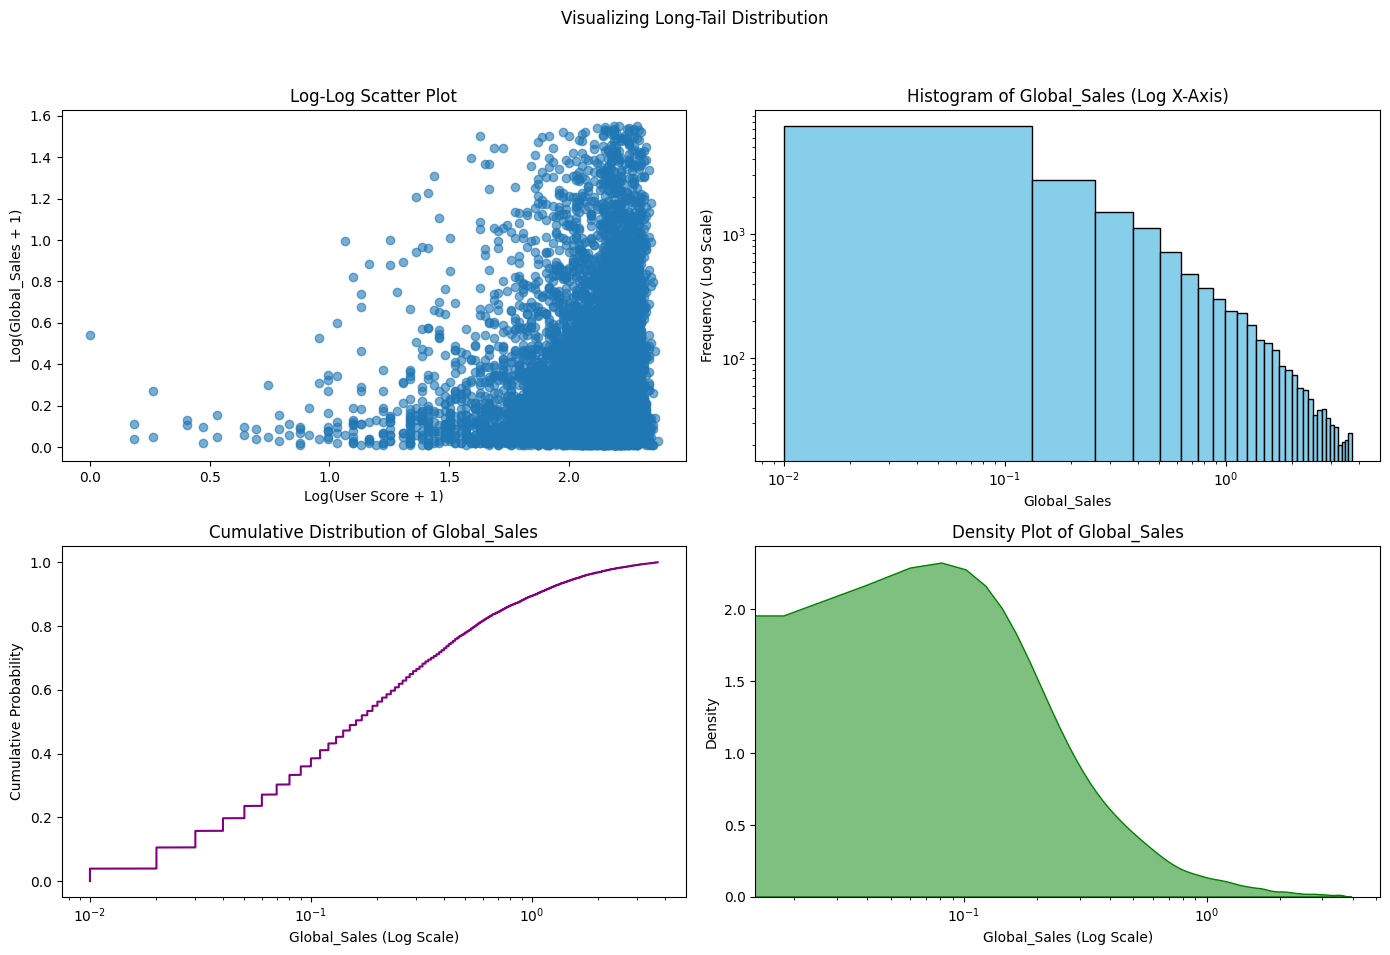

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Visualizing Long-Tail Distribution")

# 1. Log-Log Scatter Plot
axes[0, 0].scatter(np.log1p(df["User_Score"]), np.log1p(df["Global_Sales"]), alpha=0.6)
axes[0, 0].set_title("Log-Log Scatter Plot")
axes[0, 0].set_xlabel("Log(User Score + 1)")
axes[0, 0].set_ylabel("Log(Global_Sales + 1)")

# 2. Histogram of Sales with Log-Scaled X-Axis
axes[0, 1].hist(df["Global_Sales"], bins=30, color='skyblue', edgecolor='black', log=True)
axes[0, 1].set_xscale('log')
axes[0, 1].set_title("Histogram of Global_Sales (Log X-Axis)")
axes[0, 1].set_xlabel("Global_Sales")
axes[0, 1].set_ylabel("Frequency (Log Scale)")

# 3. Cumulative Distribution Plot
sorted_sales = np.sort(df["Global_Sales"])
cdf = np.arange(len(sorted_sales)) / float(len(sorted_sales))
axes[1, 0].plot(sorted_sales, cdf, color='purple')
axes[1, 0].set_xscale('log')
axes[1, 0].set_title("Cumulative Distribution of Global_Sales")
axes[1, 0].set_xlabel("Global_Sales (Log Scale)")
axes[1, 0].set_ylabel("Cumulative Probability")

# 4. Kernel Density Estimate (KDE) of Global_Sales
sns.kdeplot(df["Global_Sales"], ax=axes[1, 1], fill=True, color='green', alpha=0.5)
axes[1, 1].set_xscale('log')
axes[1, 1].set_title("Density Plot of Global_Sales")
axes[1, 1].set_xlabel("Global_Sales (Log Scale)")
axes[1, 1].set_ylabel("Density")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

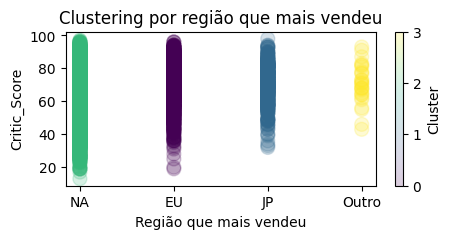

In [92]:
# from sklearn.cluster import KMeans
# from sklearn.linear_model import LinearRegression
from kmodes.kmodes import KModes 

# Colunas para embasar a clusterização
X = df[[ "Greatest" ]]

# Numero de clusters
n_clusters = 4

cluster_k = KModes( n_clusters=n_clusters, random_state=42 )
# cluster_k = KMeans( n_clusters=n_clusters, random_state=42 )

df['Cluster'] = cluster_k.fit_predict(X)

plt.figure(figsize=(5, 2))
plt.scatter( 
  df['Greatest'],
  df['Critic_Score'],

  c=df['Cluster'],
  cmap='viridis',
  s=100,
  alpha=0.2 
)

plt.xlabel('Região que mais vendeu')
plt.ylabel('Critic_Score')

plt.colorbar(label='Cluster')
plt.title('Clustering por região que mais vendeu')

plt.show()

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [94]:
# Replace zero or negative sales with a small positive value to avoid log(0) issues
df['Log_Global_Sales'] = np.log(df['Global_Sales'] + 1e-6)

In [101]:
# Define target and feature columns
target = 'Global_Sales'
numeric_features = [ 'Critic_Score']  # Example numerical features
categorical_features = [
    'Genre',
    'Platform',
    'Publisher',
    "Developer",
    # "Rating" 
]  # Example categorical features

# Handle missing values if any
df = df.dropna(subset=[target] + numeric_features)  # Drop rows where target or numeric columns are missing
df[categorical_features] = df[categorical_features].fillna('NA')  # Fill missing categorical values

# Define feature columns and split the data
X = df[numeric_features + categorical_features]
y_log = df['Log_Global_Sales']  # Transformed target variable

# Split into training and test sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [102]:
# Same preprocessing as before for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Pipeline for linear regression
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])


In [103]:
# Fit the model on the log-transformed target
model_pipeline.fit(X_train, y_train_log)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Critic_Score']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Genre', 'Platform',
                                                   'Publisher',
                                                   'Developer'])])),
                ('regressor', LinearRegression())])

In [104]:
# Predict on the log scale
y_pred_log = model_pipeline.predict(X_test)

# Reverse the log transformation to get predictions in the original scale
y_pred = np.exp(y_pred_log)

# Reverse log-transformation of test labels for comparison
y_test = np.exp(y_test_log)


/home/wolke/Documents/datascience/topicos-4/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [105]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.38597175997718636
R-squared: 0.2106676623009084


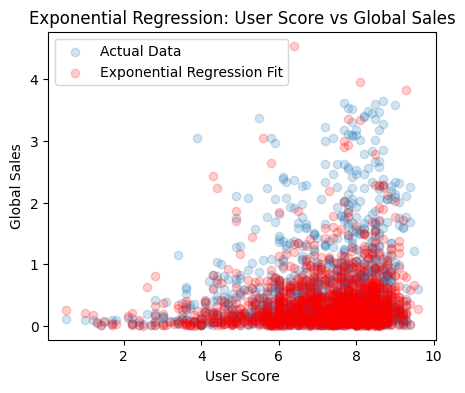

In [100]:
# Scatter plot of actual data
plt.figure(figsize=(5, 4))
plt.scatter(X_test['User_Score'], y_test, alpha=0.2, label='Actual Data')

# Plot the exponential regression line (prediction line)
plt.scatter(X_test["User_Score"], y_pred, color='red', alpha=0.2, label='Exponential Regression Fit')

# Labels and legend
plt.xlabel('User Score')
plt.ylabel('Global Sales')
plt.title('Exponential Regression: User Score vs Global Sales')
plt.legend()
plt.show()